<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.9.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

Answer:
1.  Camera and photo apps to enhance and sort images
2.  Modern cars use CV to avoid other cars and stay within lane lines
1.  Manufaturers use CV to identify defects in various products






## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Answer:


* Overfitting is when a machine learning model learns the training data too closely, including its noise, which causes it to perform poorly on new, unseen data.




## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Answer:


1.  Regularization : a technique to reduce the complexity of the model. It does so by adding a penalty term to the loss function.
2.  Data augmentation: increase the size of the data by performing different operations on it making the model learn different variations and as a result it won't perform poorly on unseen data.


1.  Early stopping:halting the training process before the model starts memorizing noise or irrelevant patterns in the training data






## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [3]:
#Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch
from torchvision import datasets, transforms


train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.09MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

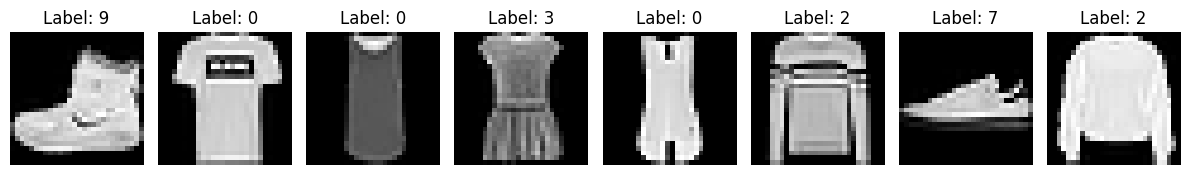

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,8, figsize=(12, 3))
for i in range(8):
    image, label = train_data[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32


train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e90036fa690>, <torch.utils.data.dataloader.DataLoader object at 0x7e8ee799c6b0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class_names = train_data.classes

class FashionMNISTModelV2(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
import torch.optim as optim
import time

def train_model(device_name):

    device = torch.device(device_name)

    model = FashionMNISTModelV2(
        input_shape=1,
        hidden_units=10,
        output_shape=len(class_names)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()

    for epoch in range(5):
        model.train()
        running_loss = 0

        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"[{device_name}] Epoch {epoch+1} Loss: {running_loss/len(train_dataloader):.4f}")

    end_time = time.time()
    duration = end_time - start_time
    print(f"\nTraining on {device_name} took {duration:.2f} seconds\n")

    return model, duration


cpu_time = train_model("cpu")

if torch.cuda.is_available():
    trained_model_gpu, gpu_time = train_model("cuda")
else:
    print("CUDA not available on this machine.")

[cpu] Epoch 1 Loss: 0.5352
[cpu] Epoch 2 Loss: 0.3497
[cpu] Epoch 3 Loss: 0.3124
[cpu] Epoch 4 Loss: 0.2897
[cpu] Epoch 5 Loss: 0.2747

Training on cpu took 299.70 seconds

CUDA not available on this machine.


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [11]:
import matplotlib.pyplot as plt

def make_predictions_and_visualize(model, device, test_dataloader, class_names, num_samples=5):
    model.eval()
    model.to(device)

    images, labels = next(iter(test_dataloader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    with torch.no_grad():
        preds = model(images)
        pred_labels = preds.argmax(dim=1)

    # Plot
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))

    for i in range(num_samples):
        img = images[i].cpu().squeeze()

        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[labels[i]]}",
                          color="green" if pred_labels[i] == labels[i] else "red")
        axes[i].axis("off")

    plt.show()


GPU

In [12]:
if torch.cuda.is_available():
    trained_model_gpu, gpu_time = train_model("cuda")

    make_predictions_and_visualize(
        model=trained_model_gpu,
        device=torch.device("cuda"),
        test_dataloader=test_dataloader,
        class_names=class_names,
        num_samples=5
    )

CPU


[cpu] Epoch 1 Loss: 0.5338
[cpu] Epoch 2 Loss: 0.3511
[cpu] Epoch 3 Loss: 0.3075
[cpu] Epoch 4 Loss: 0.2845
[cpu] Epoch 5 Loss: 0.2693

Training on cpu took 299.45 seconds



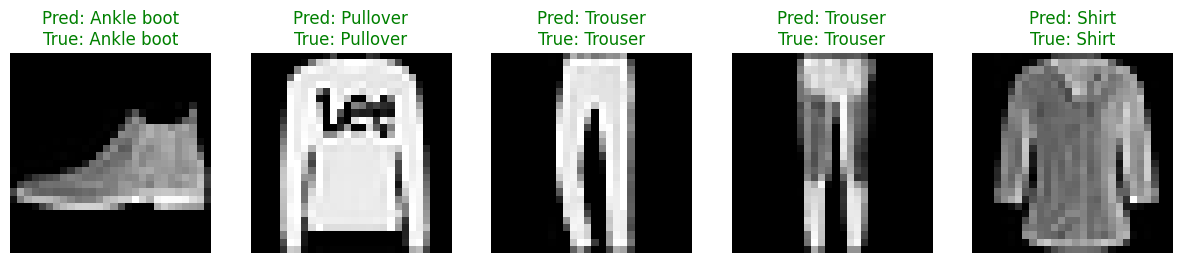

In [13]:
trained_model_cpu, cpu_time = train_model("cpu")

make_predictions_and_visualize(
    model=trained_model_cpu,
    device=torch.device("cpu"),
    test_dataloader=test_dataloader,
    class_names=class_names,
    num_samples=5
)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [14]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, dataloader, class_names, device):

    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            preds = model(X)
            pred_labels = preds.argmax(dim=1)

            all_preds.extend(pred_labels.cpu().numpy())
            all_labels.extend(y.cpu().numpy())


    cm = confusion_matrix(all_labels, all_preds)


    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=ax, cmap="Blues", colorbar=True)

    plt.title("FashionMNIST Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


GPU


In [15]:
plot_confusion_matrix(
    model=trained_model_gpu,
    dataloader=test_dataloader,
    class_names=class_names,
    device=torch.device("cuda")
)


NameError: name 'trained_model_gpu' is not defined

CPU

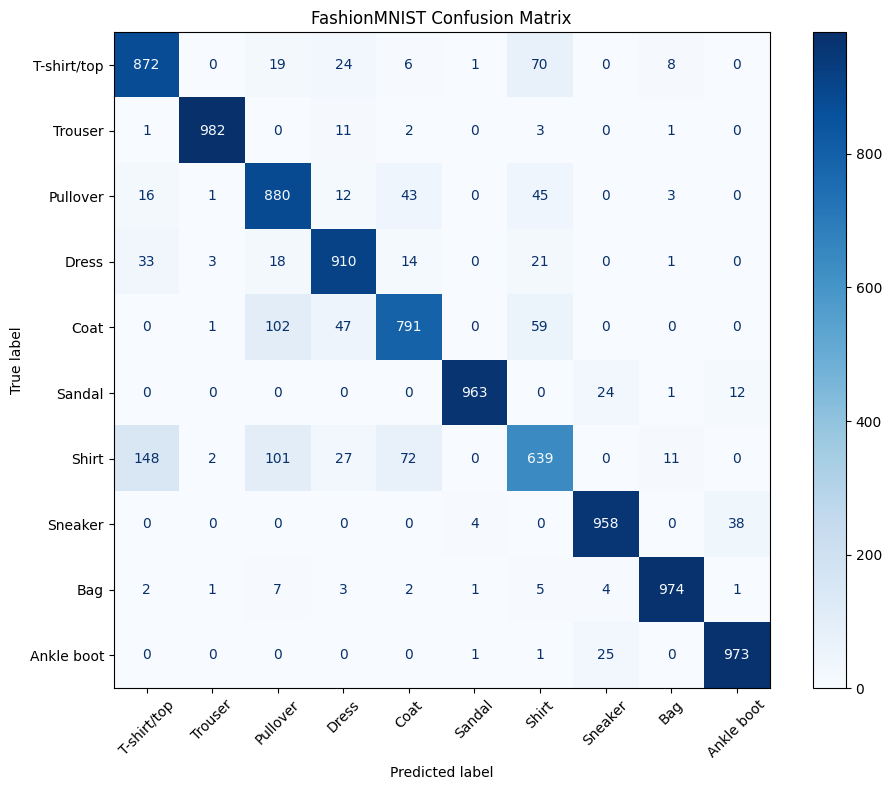

In [16]:
plot_confusion_matrix(
     model=trained_model_cpu,
    dataloader=test_dataloader,
    class_names=class_names,
    device=torch.device("cpu")
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [17]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [18]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5, 5),
                         stride=2,
                         padding=0)


conv_layer_2(test_image.unsqueeze(dim=0)).shape


#Smaller kernel → window slides more times → more outputs → larger feature map

#Larger kernel → window covers more pixels → fewer valid positions → smaller feature map

torch.Size([1, 10, 30, 30])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [19]:
from torchvision import datasets, transforms
import torch

# Define transform
transform = transforms.ToTensor()

# Load test dataset
test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=32,
    shuffle=False
)


GPU

In [ ]:
trained_model_gpu.eval()  # set model to evaluation mode

all_images = []
all_pred_labels = []
all_true_labels = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        preds = trained_model_gpu(X)
        pred_labels = preds.argmax(dim=1)

        # Store wrong predictions
        mask = pred_labels != y
        if mask.any():
            all_images.append(X[mask].cpu())
            all_pred_labels.append(pred_labels[mask].cpu())
            all_true_labels.append(y[mask].cpu())

if all_images:
    all_images = torch.cat(all_images)
    all_pred_labels = torch.cat(all_pred_labels)
    all_true_labels = torch.cat(all_true_labels)

In [ ]:
import matplotlib.pyplot as plt

num_samples = 5  # how many wrong predictions to visualize
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    img = all_images[i].squeeze()  # remove channel dim
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {class_names[all_pred_labels[i]]}\nTrue: {class_names[all_true_labels[i]]}",
                      color="red")
    axes[i].axis("off")

plt.show()


CPU

In [20]:
trained_model_cpu.eval()  # set model to evaluation mode

all_images = []
all_pred_labels = []
all_true_labels = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        preds = trained_model_cpu(X)
        pred_labels = preds.argmax(dim=1)

        # Store wrong predictions
        mask = pred_labels != y
        if mask.any():
            all_images.append(X[mask].cpu())
            all_pred_labels.append(pred_labels[mask].cpu())
            all_true_labels.append(y[mask].cpu())

if all_images:
    all_images = torch.cat(all_images)
    all_pred_labels = torch.cat(all_pred_labels)
    all_true_labels = torch.cat(all_true_labels)

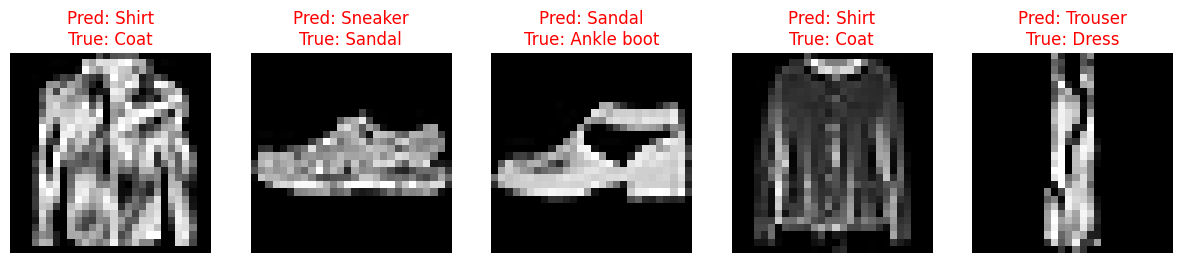

In [21]:
import matplotlib.pyplot as plt

num_samples = 5  # how many wrong predictions to visualize
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    img = all_images[i].squeeze()  # remove channel dim
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {class_names[all_pred_labels[i]]}\nTrue: {class_names[all_true_labels[i]]}",
                      color="red")
    axes[i].axis("off")

plt.show()